# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'>Edge Linking

# <span style='font-family:"Times New Roman"'> Loading Required Modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np
import math 

# <span style='font-family:"Times New Roman"'> Reading Image:

In [2]:
I = mpimg.imread('van-rear.tif')
I = I/255

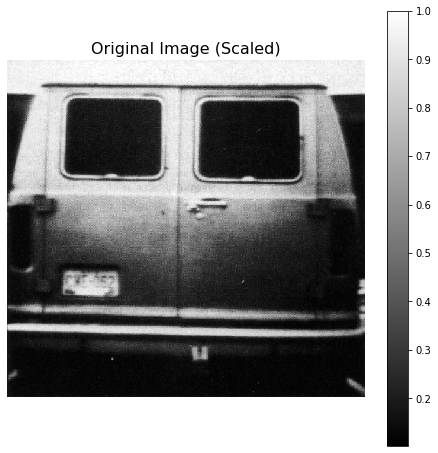

In [3]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Original Image (Scaled)', fontsize = 16)
plt.show()

# <span style='font-family:"Times New Roman"'> Computing Gradient Magnitude and Angle Using the Sobel masks:

In [4]:
sobel_horiz = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
sobel_vert = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

In [5]:
gx = ndimage.convolve(I, sobel_horiz)
gy = ndimage.convolve(I, sobel_vert)

In [6]:
M = np.sqrt(gx**2 + gy**2)
alpha = np.arctan(gy/(gx+0.000001))  

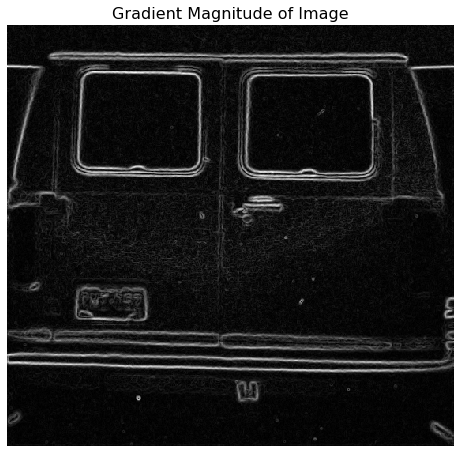

In [7]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(M,cmap='gray')
plt.axis('off')
plt.title('Gradient Magnitude of Image', fontsize = 16)
plt.show()

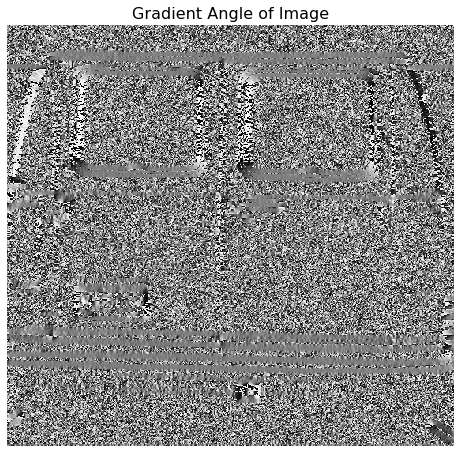

In [8]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(alpha,cmap='gray')
plt.axis('off')
plt.title('Gradient Angle of Image', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'>The gradient magnitude image has most of the properties of image clearly. Information regarding edges, are visible in this image. Boundaries of rear windows, license plate, and rear bumper are visible.
    
<span style='font-family:"Times New Roman"'>Not too much information can be found in gradient angle image. However, most horizontal edges as well as some vertical lines (not all of them) are sharpened in this image. Also, commenting about features of this image is not possible compared to gradient image.    


# <span style='font-family:"Times New Roman"'> Coding step 2 of the algorithm described on page 798 of the textbook:

In [9]:
A = 0
TA = 45
alphadeg = np.rad2deg(alpha)

In [10]:
gh = np.zeros(I.shape)
gh = np.where((M > 0.3 * np.max(M)) & ((alphadeg >= A - TA) & (alphadeg <= A + TA) ), 1, gh)

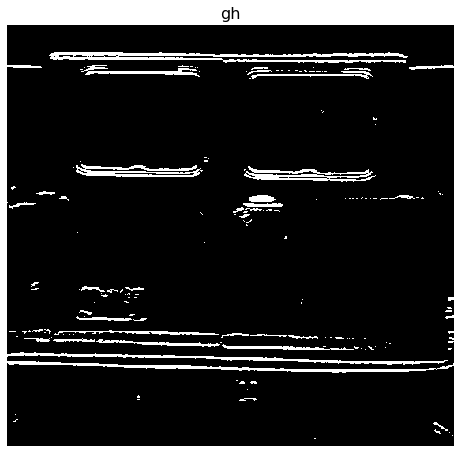

In [11]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(gh,cmap='gray')
plt.axis('off')
plt.title('gh', fontsize = 16)
plt.show()

In [12]:
A = 90
gv = np.zeros(I.shape)
gv = np.where((M > 0.3 * np.max(M)) & (np.abs(alphadeg) >= A - TA) , 1, gv)

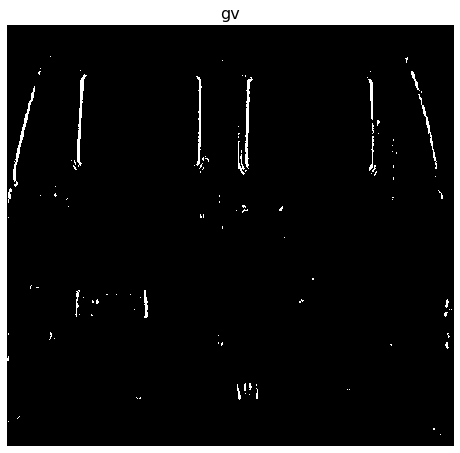

In [13]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(gv,cmap='gray')
plt.axis('off')
plt.title('gv', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'> `gh` and `gv` are displayed, respectively. As expected, `gh` contains information (edges) about horizontal lines and `gv` contains information about vertical lines. Also, the algorithm has done a good job in detecting edges in both directions. Also, discontinuities are present in both images which shows the need for connecting these smalls gaps.    

#  <span style='font-family:"Times New Roman"'> Connecting horizontal pixels using step 3 of the algorithm on page 798 of the textbook:

In [14]:
L = 25                                                #Length of selected line
gh_conn = np.zeros(I.shape)
for r in range (534):
    for c in range(566):
        a = gh[r,c:c+L]
        start, end = a.argmax(), a[::-1].argmax() + 1
        if a[start]==1:
            a[start:-end] = 1
        gh_conn[r,c:c+25] = a

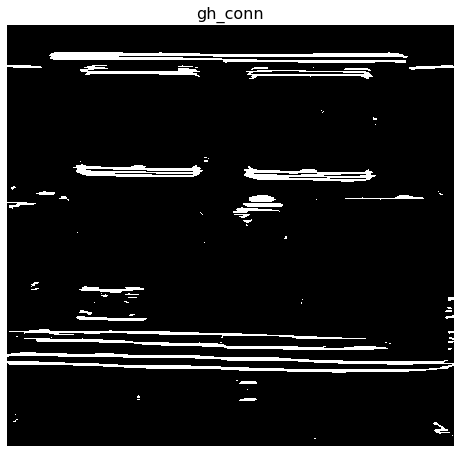

In [15]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(gh_conn,cmap='gray')
plt.axis('off')
plt.title('gh_conn', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'> The implemented technique has performed satisfactorily to fill small gaps between horizontal edge pixels. This performance can be seen in upper horizontal edge of rear window. By inspecting `gh` and `gh_conn`, it can be seen that the gaps are filled as expected. 

# <span style='font-family:"Times New Roman"'> Connecting vertical  pixels using step 3 of the algorithm on page 798 of the textbook:

In [16]:
gv_T=gv.T
gv_conn = np.zeros(gv_T.shape)
for r in range (566):
    for c in range(534):
        a = gv_T[r,c:c+L]
        start, end = a.argmax(), a[::-1].argmax() + 1
        if a[start]==1:
            a[start:-end] = 1
        gv_conn[r,c:c+25] = a
gv_conn = gv_conn.T

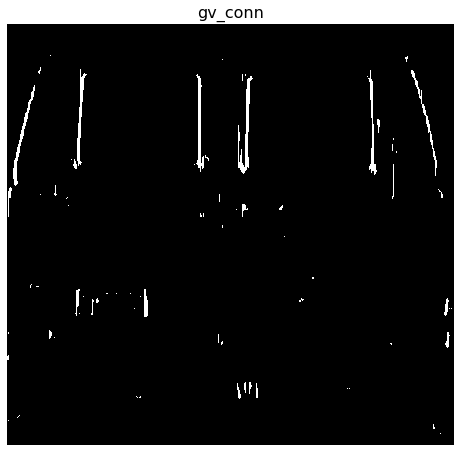

In [17]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(gv_conn,cmap='gray')
plt.axis('off')
plt.title('gv_conn', fontsize = 16)
plt.show()

<span style='font-family:"Times New Roman"'> After rotating the image 90 degrees, same algorithm has been used. Again, the algorithm did a good job by filling the gaps between pixel values of one. By comparing license plate on `gv` and `gv_conn`, the performance of the algorithm can be examined. As it is displayed, the vertical line around license plate are much more visible and thickened compared to ‘gv’.

# <span style='font-family:"Times New Roman"'> Using logical operator to generate final representation of image with edges: 

In [18]:
LOR = np.zeros(I.shape)
LOR = np.where((gv_conn == 1) | (gh_conn == 1) , 1, LOR)

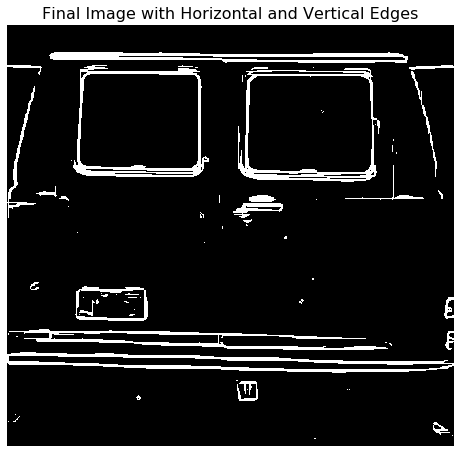

In [19]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(LOR,cmap='gray')
plt.axis('off')
plt.title('Final Image with Horizontal and Vertical Edges', fontsize = 16)
plt.show()

 <span style='font-family:"Times New Roman"'> Finally, using `gv_conn` and `gh_conn` and using logical operator “OR”, two images are converted to one image to generate an image with extracted horizontal and vertical edges. The procedure is rather easy. A zero-intensity image with size of original image is generated. Then, wherever there was a pixel with intensity of one in `gv_conn` or `gh_conn`, the intensity of corresponding pixel in zero image is replaced to `1`. The result is displayed, accordingly.  